# Final Project Part 3: Technical Notebook
### Develop a prototype model or process to successfully resolve the business problem
_By: Francesco Yuri Tinelli (Washington, D.C.)_

---

### Business Problem

Given the available Human Resource (HR) data determine which features are important/significant and predict if an employee will leave or stay with the company.

Use the general human resource data to build a random forest classification model that will classify an employee as either 'staying' or 'leaving' in order to inform/support a company's attrition and retention strategies for their workforce/employees.

### Import libraries and read in data

In [2]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read in general data/details about the employees.
general_hr = pd.read_csv('./data/general_data.csv')

# Read in survey results pertaining to empolyees' responses on 
# environment, job, and work life balance satisfaction level.
employee_survey = pd.read_csv('./data/employee_survey_data.csv')

### Clean Up Data and Perform Exploratory Data Analysis

In [4]:
# It would be beneficial to merge the two datasets and proceed with exploratory and statistical data analysis.

# Check if 'EmployeeID' is unique/distinct in both datasets to use field for merge.
print(f"General HR data has {general_hr['EmployeeID'].nunique()} distinct employee IDs and \nEmployee survey data has {employee_survey['EmployeeID'].nunique()} distinct employee IDs.")

General HR data has 4410 distinct employee IDs and 
Employee survey data has 4410 distinct employee IDs.


In [5]:
# Merge the two dataset by 'EmployeeID' and using left join and call new data set 'hr'.
hr = pd.merge(general_hr,employee_survey,how='left',on='EmployeeID')

# Check number of rows and columns to confirm proper join.
print(f'New hr data set has {hr.shape[0]} rows and {hr.shape[1]} columns with the following column names:\n {hr.columns}.')

New hr data set has 4410 rows and 27 columns with the following column names:
 Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object').


In [6]:
# Review basic statistics of combined dataset.
hr.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000


Null values for NumsCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction, WorklifeBalance

In [7]:
# Double-check null fields identified by count in 'hr.describe()'.
hr.isnull().sum()

# Percentage of missing nulls
hr.isnull().mean()

Age                        0.000000
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.000000
DistanceFromHome           0.000000
Education                  0.000000
EducationField             0.000000
EmployeeCount              0.000000
EmployeeID                 0.000000
Gender                     0.000000
JobLevel                   0.000000
JobRole                    0.000000
MaritalStatus              0.000000
MonthlyIncome              0.000000
NumCompaniesWorked         0.004308
Over18                     0.000000
PercentSalaryHike          0.000000
StandardHours              0.000000
StockOptionLevel           0.000000
TotalWorkingYears          0.002041
TrainingTimesLastYear      0.000000
YearsAtCompany             0.000000
YearsSinceLastPromotion    0.000000
YearsWithCurrManager       0.000000
EnvironmentSatisfaction    0.005669
JobSatisfaction            0.004535
WorkLifeBalance            0.008617
dtype: float64

Even though it is a small percentage of the dataset, it is preferable to keep the data/rows and fill them in.

In [8]:
# Fill in null values with mean of its column.
hr.fillna(value={'NumCompaniesWorked':hr['NumCompaniesWorked'].mean()},inplace=True)
hr.fillna(value={'TotalWorkingYears':hr['TotalWorkingYears'].mean()},inplace=True)

# Fill in null values with median of its column.
hr.fillna(value={'EnvironmentSatisfaction':hr['EnvironmentSatisfaction'].median()},inplace=True)
hr.fillna(value={'JobSatisfaction':hr['JobSatisfaction'].median()},inplace=True)
hr.fillna(value={'WorkLifeBalance':hr['WorkLifeBalance'].median()},inplace=True)

# Confirm no null values.
hr.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [9]:
# Describe of all numeric columns, grouped by attrtion.
pd.set_option('display.max_columns', None)
hr.groupby('Attrition').describe()

Age                                                     \
            count       mean       std   min   25%   50%   75%   max   
Attrition                                                              
No         3699.0  37.561233  8.885956  18.0  31.0  36.0  43.0  60.0   
Yes         711.0  33.607595  9.675693  18.0  28.0  32.0  39.0  58.0   

          DistanceFromHome                                                 \
                     count      mean       std  min  25%  50%   75%   max   
Attrition                                                                   
No                  3699.0  9.227088  8.167978  1.0  2.0  7.0  14.0  29.0   
Yes                  711.0  9.012658  7.772368  1.0  2.0  7.0  15.0  29.0   

          Education                                               \
              count      mean       std  min  25%  50%  75%  max   
Attrition                                                          
No           3699.0  2.919708  1.025784  1.0  2.0  3.0  4.0  5.0   
Yes           711.0  2.877637  1.014233  1.0  2.0  3.0  4.0  5.0   

          EmployeeCount                                    EmployeeID  \
                  count mean  std  min  25%  50%  75%  max      count   
Attrition                                                               
No               3699.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     3699.0   
Yes               711.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      711.0   

                                                                          \
                  mean          std  min     25%     50%     75%     max   
Attrition                                                                  
No         2208.139497  1273.944391  1.0  1110.5  2213.0  3304.5  4410.0   
Yes        2191.767932  1270.136654  2.0  1072.0  2165.0  3341.0  4403.0   

          EnvironmentSatisfaction                                          \
                            count      mean       std  min  25%  50%  75%   
Attrition                                                                   
No                         3699.0  2.773723  1.068453  1.0  2.0  3.0  4.0   
Yes                         711.0  2.472574  1.163540  1.0  1.0  3.0  4.0   

               JobLevel                                               \
           max    count      mean       std  min  25%  50%  75%  max   
Attrition                                                              
No         4.0   3699.0  2.068938  1.115967  1.0  1.0  2.0  3.0  5.0   
Yes        4.0    711.0  2.037975  1.057485  1.0  1.0  2.0  2.0  5.0   

          JobSatisfaction                                               \
                    count      mean       std  min  25%  50%  75%  max   
Attrition                                                                
No                 3699.0  2.779129  1.088877  1.0  2.0  3.0  4.0  4.0   
Yes                 711.0  2.471167  1.115296  1.0  1.0  3.0  3.0  4.0   

          MonthlyIncome                                                \
                  count          mean           std      min      25%   
Attrition                                                               
No               3699.0  65672.595296  47472.814021  10510.0  29360.0   
Yes               711.0  61682.616034  44792.067695  10090.0  28440.0   

                                      NumCompaniesWorked                      \
               50%      75%       max              count      mean       std   
Attrition                                                                      
No         49300.0  86060.0  199990.0             3699.0  2.648668  2.455544   
Yes        49080.0  71040.0  198590.0              711.0  2.934992  2.671279   

                                   PercentSalaryHike                       \
           min  25%  50%  75%  max             count       mean       std   
Attrition                                                                   
No         0.0  1.0  2.0  4.0  9.0            3699.0  15.157340

In [10]:
# Remove non-essential fields before correlation heatmap.
hr.drop(hr[['EmployeeCount', 'Over18', 'StandardHours']], axis = 1, inplace = True)

In [11]:
# Encode/Convert categorical data

hr['BusinessTravel'] = hr['BusinessTravel'].map({'Travel_Frequently': 2, 'Travel_Rarely': 1, 'Non-Travel': 0})
hr['Department'] =  hr['Department'].map({'Sales': 2, 'Research & Development': 1, 'Human Resources': 0})
hr['EducationField'] = hr['EducationField'].map({'Life Sciences': 5, 'Other': 4, 'Medical': 3, 
                                             'Marketing': 2,'Technical Degree': 1,'Human Resources': 0})
hr['Gender'] = hr['Gender'].map({'Female': 1, 'Male': 0})
hr['JobRole'] = hr['JobRole'].map({'Healthcare Representative': 8, 'Research Scientist': 7, 'Sales Executive': 6, 
                                   'Human Resources': 5,'Research Director': 4,'Laboratory Technician': 3,
                                   'Manufacturing Director': 2,'Sales Representative': 1,'Manager': 0})
hr['MaritalStatus'] =  hr['MaritalStatus'].map({'Married': 2, 'Single': 1, 'Divorced': 0})
hr['Attrition_num'] = hr['Attrition'].map({'Yes': 1, 'No': 0})

# Check the data types
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel               int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField               int64
EmployeeID                   int64
Gender                       int64
JobLevel                     int64
JobRole                      int64
MaritalStatus                int64
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Attrition_num                int64
dtype: object

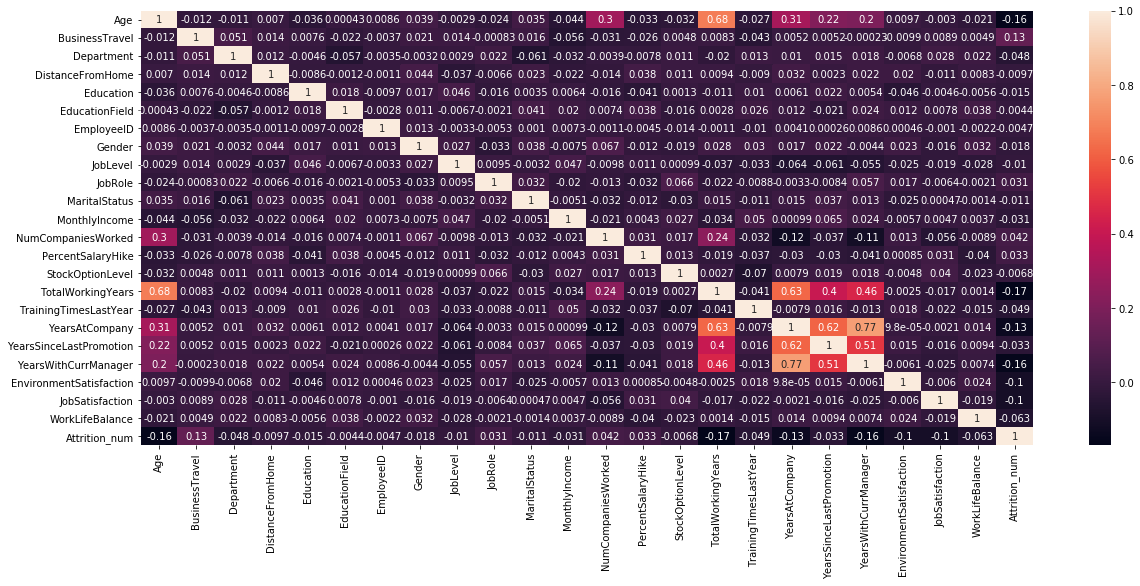

In [12]:
# Create correlation heatmap.
fig = plt.figure(figsize=(20,8))
sns.heatmap(hr.corr(),annot=True)

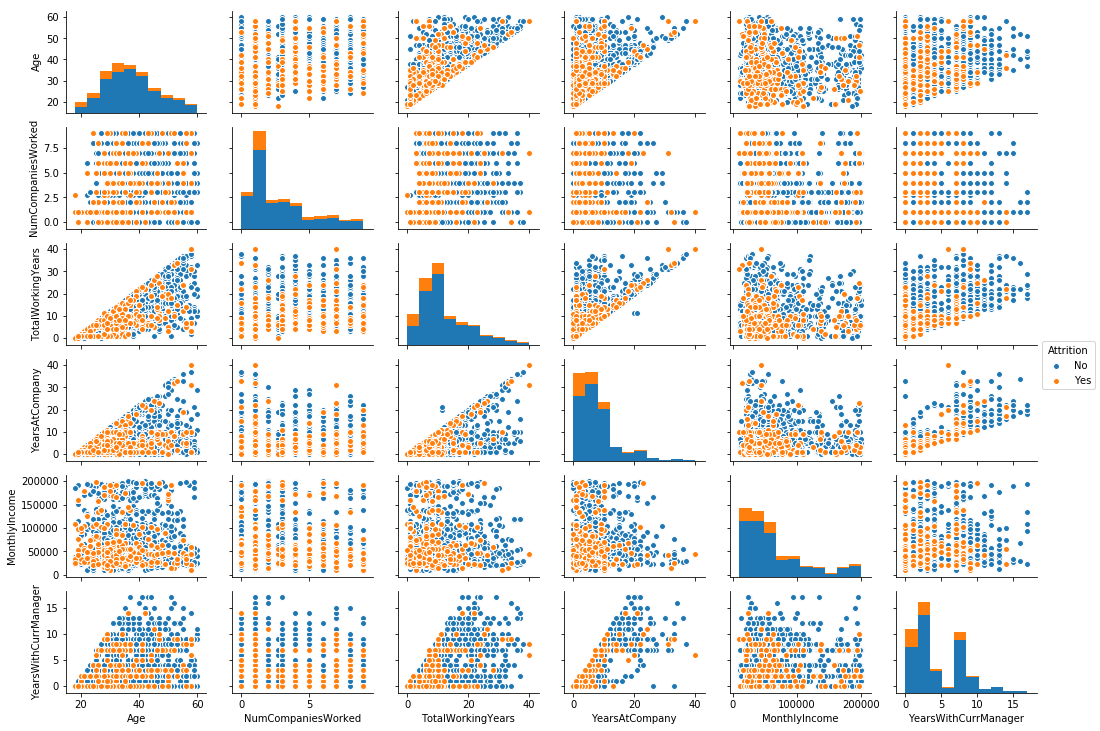

In [66]:
# Look at strong correlations and intersting features against attrition.
g=sns.pairplot(hr[['Age','NumCompaniesWorked','TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome','YearsWithCurrManager','Attrition']],hue='Attrition')
g.fig.set_figheight(10)
g.fig.set_figwidth(15)
g.savefig('pairplot.png')

With the shown feautres above you can begin to somewhat draw clear segments. Such as age & monthly income, years at company & years with with current manager, monthly income & years at company, etc.

### Random Forest Model Development

### Determine the baseline accuracy and introduce performance metrics

In [56]:
# Calculate the baseline accuracy/Determine the current attrition for company.
hr['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

16% of the employees have left the company while 84% have stayed. We can compare our model against those who have stayed (most frequent class) and see if it performs better. But there are other/better performance metrics for classification models.

Following feature selection, parameter tuning, and model implementation, model performance will be evaluated using a confusion matrix to find the precision and accuracy of the model. During feature selection and paramater tuning we will continue to check and compare accuracy of models.  

### Why Random Forest

With a large number of features Random Forest provides a more reliable estimate of feature importance and selection. Also with multiple trees we can better reduce overfitting.

#### First, determine important features

In [15]:
# Define features: Include all columns, but exclude response (Attrition).
feature_cols = hr.columns.drop(['Attrition','Attrition_num'])
feature_cols

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

In [16]:
# Create X and Y.
X = hr[feature_cols]
y = hr['Attrition_num']

It is mport to first split data into train and test set to not allow the model to 'see' full data for feature selection. 

In [17]:
# Instantiate and fit random forest.
from sklearn.ensemble import RandomForestClassifier

# Split X and Y into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 99)

# Fit the model on only the train data.
# For a classification problem with p features, it is typical to use: p^(1/2) (rounded down) features in each split.
#np.floor(np.sqrt(feature_cols.nunique()))
clf = RandomForestClassifier(n_estimators=100, max_features= 4, oob_score=True, random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

Check the OOB score and accuracy to later check against model with feature selection.

In [18]:
# Compute the out-of-bag R-squared score.
# Evaluates how predictions would be on 'unseen/new' data.
print(f'Out-of-bag R-squared score: {clf.oob_score_}\n')

# Find the average accuracy using cross validation with 10 folds.
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = np.mean(cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy'))
print(f'Average accuracy score: {accuracy}\n')

Out-of-bag R-squared score: 0.9827638342908981

Average accuracy score: 0.8975429975429977



In [19]:
# Check original shape of X.
X.shape

(4410, 23)

In [20]:
# Compute feature importance to tune model parameters.
hr_fi = pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values(by='importance',
                                                                                           ascending=False)
hr_fi

,feature,importance
0,Age,0.090955
11,MonthlyIncome,0.088912
15,TotalWorkingYears,0.081922
3,DistanceFromHome,0.060434
13,PercentSalaryHike,0.056689
17,YearsAtCompany,0.054794
19,YearsWithCurrManager,0.052771
12,NumCompaniesWorked,0.045664
9,JobRole,0.043956
20,EnvironmentSatisfaction,0.038823


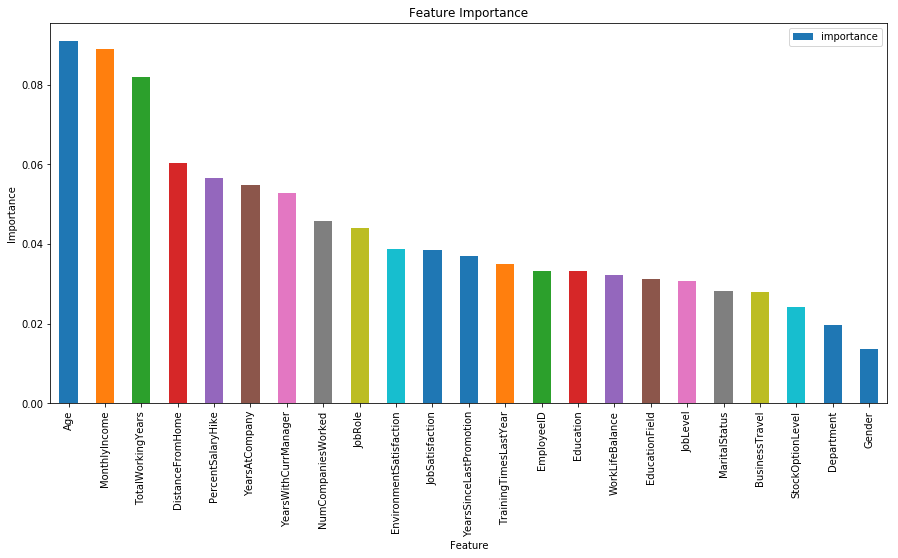

In [65]:
# Plot feature importance.
hr_fi.plot(x='feature',y= 'importance', kind='bar', title='Feature Importance',figsize=(15,7));
plt.xlabel('Feature');
plt.ylabel('Importance');
plt.savefig('feature_importace_plot.png')

In [21]:
# Create a new feature matrix that only includes important features based on threshold of fitted model above.
from sklearn.feature_selection import SelectFromModel

X_imp_feature_cols = SelectFromModel(clf, threshold='mean', prefit=True).transform(X_test) 

# Model has already been trained using fit.
# Features are kept that are greater than or equal to mean of feature importance.
# Transform reduces X to the selected features.

In [22]:
# Get shape of new feature column.
X_imp_feature_cols.shape

(1103, 9)

In [23]:
# Get new feature names and check threshold per dataframe above.
hr_fi[hr_fi['importance'] >= np.mean(hr_fi['importance'])].feature


0                      Age
11           MonthlyIncome
15       TotalWorkingYears
3         DistanceFromHome
13       PercentSalaryHike
17          YearsAtCompany
19    YearsWithCurrManager
12      NumCompaniesWorked
9                  JobRole
Name: feature, dtype: object

In [24]:
# Instantiate random forest model with only important features.
clf_fs = RandomForestClassifier(n_estimators=100, max_features=4, oob_score=True, random_state=1)

Compute accuracy from above original model with all features and compare.

In [25]:
# Find the average accuracy using cross validation with 10 folds.
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = np.mean(cross_val_score(clf_fs, X_imp_feature_cols, y_test, cv=10, scoring='accuracy'))
print(f'Average accuracy score: {accuracy}\n')

Average accuracy score: 0.8911793611793613



Accuracy slightly decreased from 0.8975429975429977. Lets continue with tuning parameters for possible imporvement.

#### Seond, tune parameters with GridSearch

In [26]:
# Create the parameter grid.
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [10,30,50,70,90,110,130,150,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

# Create a based model.
clf_pt = RandomForestClassifier(random_state=1)

# Instantiate the grid search mode.
gsearch = GridSearchCV(clf_pt, param_grid=param_grid, cv=10)

# Fit the grid search to the data.
gsearch.fit(X_train, y_train)

# Get best parameters.
gsearch.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}

#### Run model with feature selections and  tuned parameters

In [41]:
# Create X and Y, with X being important features.
X = hr[['Age','MonthlyIncome','TotalWorkingYears','DistanceFromHome','PercentSalaryHike','YearsAtCompany','YearsWithCurrManager','NumCompaniesWorked','JobRole']]
y = hr['Attrition_num']

# Split X and Y into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 99)

# Instantiate model with tuned parameters then fit to training set.
clf_fin = RandomForestClassifier(n_estimators=200, max_features= 'auto', criterion='gini',
                                 oob_score=True, random_state=1)
clf_fin.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [44]:
# Compute the out-of-bag R-squared score.
#Evaluates how predictions would be on 'unseen/new' data.
print(f'Out-of-bag R-squared score: {clf_fin.oob_score_}\n')

# Find the average accuracy using cross validation with 10 folds.
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = np.mean(cross_val_score(clf_fin, X_test, y_test, cv=10, scoring='accuracy'))
print(f'Average accuracy score: {accuracy}\n')

Out-of-bag R-squared score: 0.9888116117326883

Average accuracy score: 0.893898443898444



Compared to original

In [29]:
# Compute the out-of-bag R-squared score.
# Evaluates how predictions would be on 'unseen/new' data.
print(f'Out-of-bag R-squared score: {clf.oob_score_}\n')

# Find the average accuracy using cross validation with 10 folds.
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = np.mean(cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy'))
print(f'Average accuracy score: {accuracy}\n')

Out-of-bag R-squared score: 0.9827638342908981

Average accuracy score: 0.8975429975429977



Although very slightly, the accuracy score has decreased but with an improvement to OOB score lowering the variance.

### Random Forest Model Evaluation

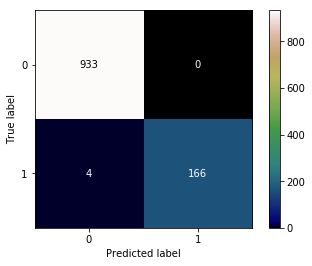

In [68]:
# Create confusion matrx by passing trained final model.
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf_fin,X_test,y_test, cmap='gist_earth', values_format='.3g')
plt.savefig('confusion_matrix.png')

The final random forest classification model made a total of 1,103 predictions, meaning it classified 1,103 employees as either staying or leaving. Recall we mapping/encoding from the start, `hr['Attrition_num'] = hr['Attrition'].map({'Yes': 1, 'No': 0})`. 

Out of the 1,103 predictions the model classified 937 employees as staying and 166 employees leaving. In terms of attrition, 15% of the employees would have left the company while 85% have stayed. 

Where in the test data, the actual employees that stayed is 933 and 170 that left.

Interestingly enough the model had 0 false positive, meaning there were no instances when the model predicted the employee will leave and actually the employee stayed. Speaks to the high OOB score and insightfulfor attrition strategies.

Remembering that data showed 16% of the employees have left the company while 84% have stayed.

In [48]:
# Return confusion matrix report with metrics based on True Positive, False Positives, and False Negatives.
from sklearn.metrics import classification_report

# First, get model predictions.
y_pred = clf_fin.predict(X_test)

# Print confusion matrix report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       933
           1       1.00      0.98      0.99       170

    accuracy                           1.00      1103
   macro avg       1.00      0.99      0.99      1103
weighted avg       1.00      1.00      1.00      1103



The business objective is to focus on those who would leave the company to the update/tailor attrition strategies to retain these employees. Thus, we can evaluate how the model performed based on when the actual employee left and how often the prediction is correct. The two metrics would be sensitivity/recall/true positive rate and precision.

Sensitivity/Recall - when the employee left, how often is the prediction correct?
98%

Precision - when the model predicted the employee would leave, how often is the prediction correct?
100%